## Homework 1 - Bollinger Bands

A **Bollinger Band®** is a technical analysis tool defined by a set of **trendlines plotted two standard deviations (positively and negatively) away from a simple moving average (SMA)** of a security's price, but which can be adjusted to user preferences. Bollinger Bands® were developed and copyrighted by the famous technical trader John Bollinger, designed to  identify when an asset is oversold or overbought. Many traders believe the closer the prices move to the upper band, the more overbought the market is, and the closer the prices move to the lower band, the more oversold the market is <a href="https://www.investopedia.com/terms/b/bollingerbands.asp">[1]</a>.

**Task 1** consists in reading the whole APPL (Apple Inc.) dataset available in the _data_ directory, computing and plotting the Bollinger bands of the adjusted close price, moving average (20 days window size) and the adjusted close price itself. **Task 2** consists in identifying potential buying and selling opportunities and plotting vertical lines in the plot: green corresponding to buy signals, red to sell signals.

The output plot should look similar to this:
<img src="data/press_images/signals_by_boil.svg"/>

To implement Bollinger bands you may want to review the lecture of October 21: _rolling mean_, _rolling standard deviation_, _arrays operations and indexing_, _dataframe plotting_. The homework is due **by Friday November 5, 2021**. Should you need further clarifications or help, please feel free to contact us before the deadline.

Additional material:
- https://www.investopedia.com/terms/b/bollingerbands.asp
- https://www.bollingerbands.com/bollinger-band-rules
- https://www.iforex.in/bollinger-bands

<img src="data/press_images/bollingerbands_formulas.jpg" width="600" height="200"/>

In [13]:
import os
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.width = 1200

import matplotlib
matplotlib.rc('figure', figsize=(10,3), dpi=200)

ALL_SYMBOLS = ["AAPL"]
DATE_RANGES = ('2019-09-01', '2021-09-01')

In [12]:
def adjusted_close_symbols(symbols, date_range):
    """ Joins an empty DataFrame with index, with multiple stocks dataframes. """

    # dates is formatted as YYYY-MM-DD
    dates = pd.date_range(*date_range)

    # An empty dataframe
    df1 = pd.DataFrame(index=dates) # the dataframe only with the index

    for sym in symbols:
        path_to_file = os.path.join("data", "%s.csv" % sym)
        dfSYM = pd.read_csv(path_to_file, index_col="Date", parse_dates=True, usecols=["Date", "Adj Close"]) # na_values=['nan']
        dfSYM = dfSYM.rename(columns= {'Adj Close': sym})
        df1 = df1.join(dfSYM, how="inner")
    return df1

In [34]:
df = adjusted_close_symbols(ALL_SYMBOLS, DATE_RANGES)
print(df)

                  AAPL
2019-09-03   50.594364
2019-09-04   51.452770
2019-09-05   52.458759
2019-09-06   52.453835
2019-09-09   52.677662
...                ...
2021-08-25  148.360001
2021-08-26  147.539993
2021-08-27  148.600006
2021-08-30  153.119995
2021-08-31  151.830002

[504 rows x 1 columns]


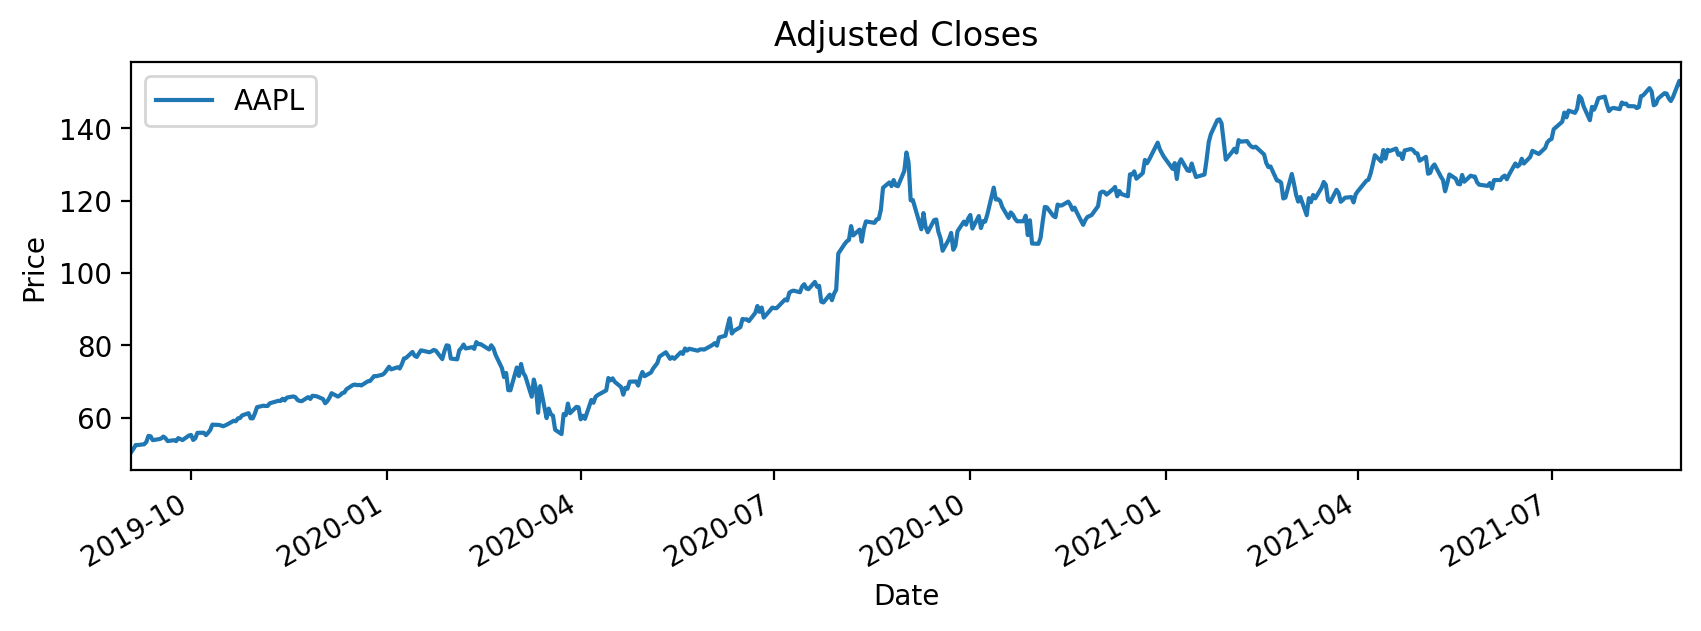

In [35]:
# plotting procedure 
ax = df.plot(title="Adjusted Closes")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
plt.legend(loc='upper left', ncol=3) # better visualize the legend
plt.show()

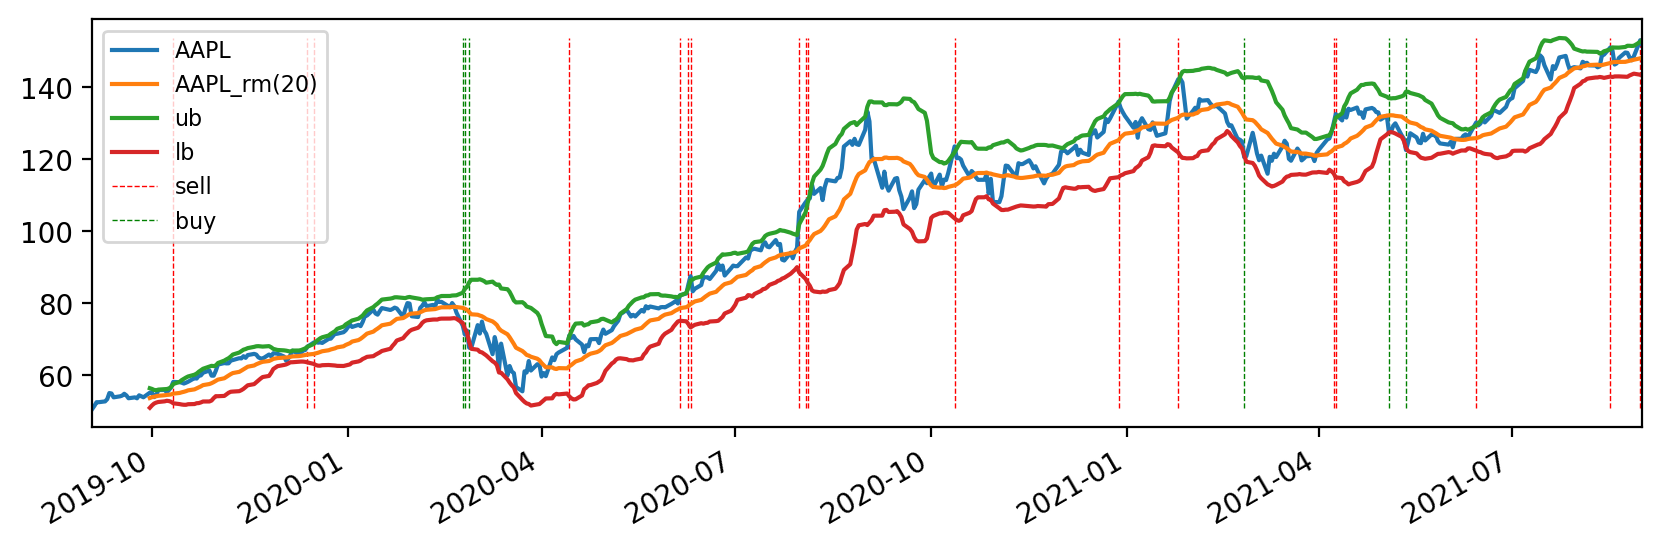

In [73]:
# TO DO: 
"""
implementare un sistema di cooldown per i segnali di acquisto e vendita
penso che un for loop sia necessario
"""


window_size = 20 # days
F = 2.3
df["AAPL_rm({})".format(window_size)] = df.rolling(window_size).mean()  # add a column to the dataframe
df["ub"] = df["AAPL_rm({})".format(window_size)] + (df["AAPL"].rolling(window_size).std() * F)
df["lb"] = df["AAPL_rm({})".format(window_size)] - (df["AAPL"].rolling(window_size).std() * F)

ax = df.plot()
#ax.axhline(y=df.mean()[0], color='r', linestyle='-', label="global mean") 
ax.vlines(x=df[df["AAPL"]>=df["ub"]].index.values, ymin=df["lb"].min(), ymax=df["ub"].max(), color='r', linestyle='--', lw=0.5, label="sell")
ax.vlines(x=df[df["AAPL"]<=df["lb"]].index.values, ymin=df["lb"].min(), ymax=df["ub"].max(), color='g', linestyle='--', lw=0.5, label="buy")

plt.legend(fontsize=8)
plt.show()

In [ ]:
[True,True,True,True,False,False,False,False,True]